# CS-770: Machine Learning (Final Project)

Name: Padmanjali Chintakrindi

#### 1. Train a deep learning classifier for any binary image classification task of your choice. The deep-learning classifier should consist of a set of convolutional and fully connected layers followed by the final output layer for image classification. Motivate the choice of the model. Use appropriate metrics to evaluate the model on the test set. Compare the performance of your deep learning model with three traditional machine learning models of your choice evaluated on the same test set.

#### a) Code

Introduction: To train a deep learning classifer I'm considering the brain tumor dataset from kaggle. It has two categories of data one of which contains images of brain scan which has brain tumor while the other category contains images with no brain tumor. The link to the dataset is: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
This dataset has 155 images with brain tumor and 98 images with no tumor. I'm using 80 images from the first set and 50 images from the second set to train the classifier model.

#### CNN deep learning classifier for binary image classification

In [91]:
#step1: import libraries necessary to run the classifier

import os as library #we use os library to work with the file directories and file paths
import numpy as npy_arrays #we use numpy arrays to store preprocessed data
from PIL import Image as P_Image #we use PIL library to preprocess the images
from keras import models as K_Model #we use models from keras to build a neural network classifier
from keras import layers as K_Layer 
#we use layers from keras to add convolutional and fully connected layers to the model
from keras import optimizers as optims #we use optimizer from keras to feed the CNN classifier
from sklearn import metrics as sk_metrics #we use metrics to calculate the accuracy and precision score
from sklearn import linear_model as lin_mdl #import linear model
from sklearn.pipeline import Pipeline as Pipe_Ln #we use pipeline to initialize SVM
from sklearn import preprocessing as Pre_Process #we use preprocessing to assign a scaler in SVM
from sklearn import svm as SVM #import SVM to clasify images
import matplotlib.pyplot #import matplotlib to plot accuracies

In [13]:
#step2: create variables to store the image arrays and image dimensions

img_ht = 256 #consider image height to be 225 pixels
img_wt = 256 #consider image width to be 225 pixels
tumor_true_path = "brain_tumor_data/brain_tumor_true" #path to the images with brain tumor
tumor_false_path = "brain_tumor_data/brain_tumor_false" #path to the images without brain tumor
tumor_train_image_array = [] #initialize array to store train dataset
tumor_test_image_array = [] #initialize array to store test dataset
tumor_train_lbl_array = [] #initialize array to store binary labels for train array
tumor_test_lbl_array = [] #initialize array to store binary labels for test array
epoch_count = 50 #number of epoches to use while training the model

In [14]:
#step3: loop through the folder and append the images to the arrays after preprocessing

for tumor_img in library.listdir(tumor_true_path): #loop the folder that has images with tumor
    path = tumor_true_path+"/"+tumor_img #path to the image
    tumor_img = P_Image.open(path).convert('RGB') #convert the image to RGB using PIL library
    tumor_img = tumor_img.resize((img_wt,img_ht)) #resize image using height and width variables
    tumor_img = npy_arrays.array(tumor_img) / 255.0  #convert to numpy array and normalize the pixel values
    if(len(tumor_train_image_array)<80): #insert only 80 images to train array
        tumor_train_image_array.append(tumor_img) #append image to train array if it has less than 80 images
        tumor_train_lbl_array.append(1) #append a binary label of 1 for images with tumor
    else:
        tumor_test_image_array.append(tumor_img) #append image to test array if train array has 80 images
        tumor_test_lbl_array.append(1) #append a binary label of 1 form images with tumor

# repeat the process for images with no tumor

for no_tumor_img in library.listdir(tumor_false_path): #loop the folder that has images without tumor
    path = tumor_false_path+"/"+no_tumor_img #path to the image
    no_tumor_img = P_Image.open(path).convert('RGB') #convert the image to RGB using PIL library
    no_tumor_img = no_tumor_img.resize((img_wt,img_ht)) #resize image using height and width variables
    no_tumor_img = npy_arrays.array(no_tumor_img) / 255.0  #convert to numpy array and normalize the pixel values
    if(len(tumor_train_image_array)<130): 
        #insert only 50 images to train array from this folder so total length is 130
        tumor_train_image_array.append(no_tumor_img) #append image to train array if it has less than 130 images
        tumor_train_lbl_array.append(0) #append a binary label of 0 for images without tumor
    else:
        tumor_test_image_array.append(no_tumor_img) #append image to test array if train array has 130 images
        tumor_test_lbl_array.append(0) #append a binary label of 0 for images with tumor

In [15]:
tumor_train_image_array = npy_arrays.array(tumor_train_image_array) #convert the array to numpy array
len(tumor_train_image_array) #length of train images array

130

In [16]:
tumor_train_lbl_array = npy_arrays.asarray(tumor_train_lbl_array).astype('float32').reshape((-1,1)) 
#convert the array to numpy array
len(tumor_train_lbl_array) #length of train labels array

130

In [17]:
tumor_test_image_array = npy_arrays.array(tumor_test_image_array) #convert the array to numpy array
len(tumor_test_image_array) #length of test images array

123

In [18]:
tumor_test_lbl_array = npy_arrays.asarray(tumor_test_lbl_array).astype('float32').reshape((-1,1))  
#convert the array to numpy array
len(tumor_test_lbl_array) #length of test labels array

123

In [19]:
#step4: create a neural network classifier model and add layers to it

CNN_Classifier = K_Model.Sequential([ 
    #we use sequential model to connect all the layers in the model in a sequential order
    K_Layer.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=(img_wt, img_ht, 3)), 
    #the above layer is the fundamental building bloack and is used to extract the features from the images
    K_Layer.Conv2D(32, 3, activation="relu"),
    #the above layer uses 32 filters to extract the features using relu activation function
    K_Layer.MaxPool2D(pool_size=2, padding="valid"),
    #the above layer is used to reduce the spatial size of the output feature maps
    K_Layer.MaxPool2D(2),#this layer is used to down sample the features generated by previous layers
    K_Layer.Flatten(),#this layer transforms the output from pervious layers to 1D feature
    K_Layer.Dense(256, activation="relu"), #this is a fully connected layer with 256 neurons
    K_Layer.Dense(128, activation="relu"), #this is the second fully connected dense layer with 128 neurons
    K_Layer.Dense(1, activation="sigmoid")  
    #the final Dense layer with 1 neuron and sigmoid activation function is used for binary image classification 
    #tasks as it allows the model to output a probability of the inputs.
])

In [20]:
CNN_Classifier.summary() #this gives the summary of layers added to the classifier

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 32)      18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)           

In [21]:
#step5: compile the classifier

loss_function = "binary_crossentropy" 
#this is a loss function used in binary image classification as this functions finds the probability
preferred_optimizer = optims.Adam()
#Adaptive Moment Estimation (ADAM) adjusts the learning rate for each parameter 
#during training which can result in better performance 
CNN_Classifier.compile(preferred_optimizer, loss_function, ["accuracy"]) 
#compile the classifier using the loss function and optimizer

In [22]:
#step6: train the classifier with the train dataset

classifier_history = CNN_Classifier.fit(tumor_train_image_array, #pass the train dataset images
                                        tumor_train_lbl_array, #pass the train dataset labels
                                        epochs = epoch_count, #pass the epoch count
                                        validation_data = (tumor_test_image_array, tumor_test_lbl_array)) 
                                        #pass the test dataset for validation

Epoch 1/50
5/5 [==============================] - 36s 7s/step - loss: 1.2824 - accuracy: 0.6538 - val_loss: 0.5847 - val_accuracy: 0.6341
Epoch 2/50
5/5 [==============================] - 36s 7s/step - loss: 0.5945 - accuracy: 0.7231 - val_loss: 0.5633 - val_accuracy: 0.7317
Epoch 3/50
5/5 [==============================] - 35s 7s/step - loss: 0.4770 - accuracy: 0.7692 - val_loss: 1.0410 - val_accuracy: 0.4634
Epoch 4/50
5/5 [==============================] - 36s 7s/step - loss: 0.6988 - accuracy: 0.6692 - val_loss: 0.5583 - val_accuracy: 0.7480
Epoch 5/50
5/5 [==============================] - 35s 7s/step - loss: 0.4598 - accuracy: 0.8154 - val_loss: 0.5221 - val_accuracy: 0.8049
Epoch 6/50
5/5 [==============================] - 35s 7s/step - loss: 0.3839 - accuracy: 0.8462 - val_loss: 0.5468 - val_accuracy: 0.7724
Epoch 7/50
5/5 [==============================] - 40s 8s/step - loss: 0.3606 - accuracy: 0.8154 - val_loss: 0.6436 - val_accuracy: 0.7967
Epoch 8/50
5/5 [==================

In [23]:
#step7: calculate the test accuracy and loss

loss, accuracy = CNN_Classifier.evaluate(tumor_test_image_array, tumor_test_lbl_array) 
#calculate the accuracy by evaluating the model
print('Test loss: {:.4f}'.format(loss))#print the test loss
print('Test accuracy: {:.4f}'.format(accuracy))#print the test accuracy

4/4 [==============================] - 4s 925ms/step - loss: 1.8363 - accuracy: 0.7967
Test loss: 1.8363
Test accuracy: 0.7967


In [24]:
#step8: predict the tumor using the trained model

brain_tumor_predicted = CNN_Classifier.predict(tumor_test_image_array) #pass the test dataset to predict function

4/4 [==============================] - 6s 1s/step


In [31]:
brain_tumor_predicted = npy_arrays.round(brain_tumor_predicted) 
#round the predicted values to the nearest binary values

In [32]:
#step9: calculate the metrics for the trained model

print("Accuracy of the deep learning classifier: "+ 
      str(sk_metrics.accuracy_score(tumor_test_lbl_array,brain_tumor_predicted))) #print the accuracy

Accuracy of the deep learning classifier: 0.7967479674796748


In [33]:
print("Precision of the deep learning classifier: "+ 
      str(sk_metrics.precision_score(tumor_test_lbl_array,brain_tumor_predicted))) #print the precision

Precision of the deep learning classifier: 0.8378378378378378


In [35]:
print("Recall Score of the deep learning classifier: "+ 
      str(sk_metrics.recall_score(tumor_test_lbl_array,brain_tumor_predicted))) #print the recall score

Recall Score of the deep learning classifier: 0.8266666666666667


In [36]:
print("F1 score of the deep learning classifier: "+ 
      str(sk_metrics.f1_score(tumor_test_lbl_array,brain_tumor_predicted))) #print the f1 score

F1 score of the deep learning classifier: 0.8322147651006713


I have considered a convolutional neural network model as a deep learning classifier because CNN's are designed to handle image data and can learn features from images effectively. The CNN models have multiple layers which include convolutional layers that use a set of filters on the imput images to learn the local patterns and features. The advantage of using CNN model is that it has a hierarchial structure of layers that allows the model to learn increasingly complex representations of images. The convolutional layers learn local patterns and features while the fully connected layers learn global representation of images based on the local patterns derived by the convolutional layers. Hence, CNN models are highly effective in capturing both high and low level features of the images. CNN also have the ability to learn from the trained data using back propagation. So, I believe opting CNN model as a deep learning classifier for binary image classification is the best choice as it is evident that CNNs are best suitable for binary image classification.

The metrics obtained after training a CNN deep learning classifier to detect MRI scan images with or without brain tumor are as belows:

#### Accuracy: 79.67
#### Precision: 0.837
#### Recall Score: 0.826
#### F1 Score: 0.832

#### Traditional Machine Learning models


##### Logistic Regression

In [40]:
#step1: change the shape of image arrays to 1D
Log_Reg_Train = tumor_train_image_array.reshape(tumor_train_image_array.shape[0],-1) #reshape the train images to 1D
Log_Reg_Test = tumor_test_image_array.reshape(tumor_test_image_array.shape[0],-1) #reshape the test images to 1D

In [45]:
#step2: create a logistic regression model

Log_Reg_Model = lin_mdl.LogisticRegression(max_iter=10000) #initialize the model

In [46]:
#step3: train the Logicstic regression model

Log_Reg_Model.fit(Log_Reg_Train, tumor_train_lbl_array.ravel()) #fit the model with train data

LogisticRegression(max_iter=10000)

In [48]:
#step4: predict the classification for test dataset using Logistic regression

Log_Reg_Predictions = Log_Reg_Model.predict(Log_Reg_Test) #pass the test dataset to predict

In [67]:
#step5: calculate the metrics for the trained model

print("Accuracy of Logistic Regression model is: "+ 
      str(sk_metrics.accuracy_score(tumor_test_lbl_array,Log_Reg_Predictions))) #print the accuracy

Accuracy of Logistic Regression model is: 0.7479674796747967


In [68]:
print("Precision of Logistic Regression model is: "+ 
      str(sk_metrics.precision_score(tumor_test_lbl_array,Log_Reg_Predictions))) #print the precision

Precision of Logistic Regression model is: 0.8142857142857143


In [51]:
print("Recall Score of Logistic Regression model is: "+ 
      str(sk_metrics.recall_score(tumor_test_lbl_array,Log_Reg_Predictions))) #print the recall score

Recall Score of Logistic Regression model is: 0.76


In [52]:
print("F1 score of Logistic Regression model is: "+ 
      str(sk_metrics.f1_score(tumor_test_lbl_array,Log_Reg_Predictions))) #print the f1 score

F1 score of Logistic Regression model is: 0.7862068965517242


The metrics obtained after training a Logistic Regression model to detect MRI scan images with or without brain tumor are as belows:

#### Accuracy: 74.79
#### Precision: 0.814
#### Recall Score: 0.76
#### F1 Score: 0.7862

##### Support Vector Machine (SVM)

In [58]:
#step1: change the shape of image arrays to 1D

SVM_Train = tumor_train_image_array.reshape(tumor_train_image_array.shape[0],-1) #reshape the train images to 1D
SVM_Test = tumor_test_image_array.reshape(tumor_test_image_array.shape[0],-1) #reshape the test images to 1D

In [59]:
#step2: initialize a SVM classifier to preprocess the data

SVM_Model = Pipe_Ln([("scaler", Pre_Process.StandardScaler()),("linear_svc", SVM.LinearSVC(C=1, loss="hinge"))])
#initialize a SVM model using pipeline and StandardScaler

In [61]:
#step3: train the SVM model

SVM_Model.fit(SVM_Train, tumor_train_lbl_array.ravel()) #send the train dataset to the SVM model

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [62]:
#step4: predict the classification for test dataset using SVM

SVM_Model_Prediction = SVM_Model.predict(SVM_Test) #pass the test dataset for prediction

In [63]:
#step5: calculate the metrics for the trained model

print("Accuracy of SVM model is: "+ 
      str(sk_metrics.accuracy_score(tumor_test_lbl_array,SVM_Model_Prediction))) #print the accuracy

Accuracy of SVM model is: 0.7398373983739838


In [64]:
print("Precision of SVM model is: "+ 
      str(sk_metrics.precision_score(tumor_test_lbl_array,SVM_Model_Prediction))) #print the precision

Precision of SVM model is: 0.8208955223880597


In [65]:
print("Recall Score of SVM model is: "+ 
      str(sk_metrics.recall_score(tumor_test_lbl_array,SVM_Model_Prediction))) #print the recall score

Recall Score of SVM model is: 0.7333333333333333


In [66]:
print("F1 score of SVM model is: "+ 
      str(sk_metrics.f1_score(tumor_test_lbl_array,SVM_Model_Prediction))) #print the f1 score

F1 score of SVM model is: 0.7746478873239437


The metrics obtained after training a SVM model to detect MRI scan images with or without brain tumor are as belows:

#### Accuracy: 73.98
#### Precision: 0.820
#### Recall Score: 0.733
#### F1 Score: 0.774

##### Ridge Regression

In [69]:
#step1: change the shape of image arrays to 1D
Rid_Reg_Train = tumor_train_image_array.reshape(tumor_train_image_array.shape[0],-1) #reshape the train images to 1D
Rid_Reg_Test = tumor_test_image_array.reshape(tumor_test_image_array.shape[0],-1) #reshape the test images to 1D

In [70]:
#step2: create a Ridge regression model

Rid_Reg_Model = lin_mdl.Ridge(alpha=1) #initialize the model

In [71]:
#step3: train the Logicstic regression model

Rid_Reg_Model.fit(Rid_Reg_Train, tumor_train_lbl_array.ravel()) #fit the model with train data

Ridge(alpha=1)

In [81]:
#step4: predict the classification for test dataset using Logistic regression

Rid_Reg_Predictions = Rid_Reg_Model.predict(Rid_Reg_Test) #pass the test dataset to predict

In [82]:
Rid_Reg_Predictions = npy_arrays.round(Rid_Reg_Predictions) 
#round the predicted values to the nearest binary values

In [85]:
#step5: calculate the metrics for the trained model

print("Accuracy of Ridge Regression model is: "+ 
      str(sk_metrics.accuracy_score(tumor_test_lbl_array,Rid_Reg_Predictions))) #print the accuracy

Accuracy of Ridge Regression model is: 0.7073170731707317


In [88]:
print("Precision of Ridge Regression model is: "+ 
      str(sk_metrics.precision_score(tumor_test_lbl_array,Rid_Reg_Predictions, average='micro'))) 
#print the precision

Precision of Ridge Regression model is: 0.7073170731707317


In [89]:
print("Recall Score of Ridge Regression model is: "+ 
      str(sk_metrics.recall_score(tumor_test_lbl_array,Rid_Reg_Predictions, average='micro'))) 
#print the recall score

Recall Score of Ridge Regression model is: 0.7073170731707317


In [90]:
print("F1 score of Ridge Regression model is: "+ 
      str(sk_metrics.f1_score(tumor_test_lbl_array,Rid_Reg_Predictions, average='micro'))) #print the f1 score

F1 score of Ridge Regression model is: 0.7073170731707317


The metrics obtained after training a Logistic Regression model to detect MRI scan images with or without brain tumor are as belows:

#### Accuracy: 70.73
#### Precision: 0.70
#### Recall Score: 0.70
#### F1 Score: 0.707

##### Comparision of 4 Models

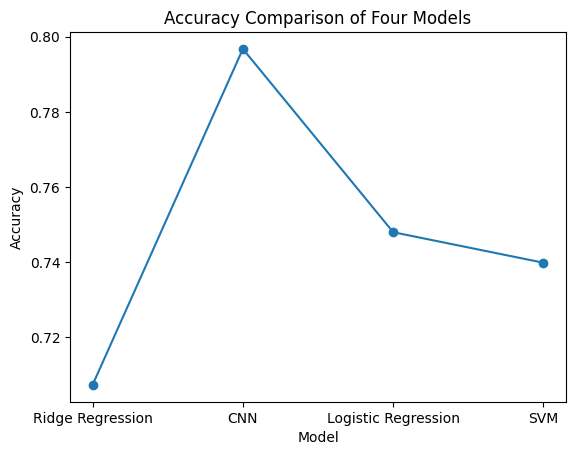

In [99]:
#step1: plot a line graph to compare the accuracies of the models

model_names = ['Ridge Regression', 'CNN', 'Logistic Regression', 'SVM'] #X labels for different models
accuracies = [sk_metrics.accuracy_score(tumor_test_lbl_array,Rid_Reg_Predictions), #accuracy of Ridge regression
              sk_metrics.accuracy_score(tumor_test_lbl_array,brain_tumor_predicted), #accuracy of CNN model
              sk_metrics.accuracy_score(tumor_test_lbl_array,Log_Reg_Predictions),  #accuracy of Logistic regression
              sk_metrics.accuracy_score(tumor_test_lbl_array,SVM_Model_Prediction)] #accuracy of SVM model

# Create a bar plot of the accuracies
matplotlib.pyplot.plot(model_names, accuracies, marker='o') # plot the line chart

# Add labels and title to the plot
matplotlib.pyplot.xlabel('Model') #x labels for the plot
matplotlib.pyplot.ylabel('Accuracy') #y values for the plot
matplotlib.pyplot.title('Accuracy Comparison of Four Models') #title of the plot

# Show the plot
matplotlib.pyplot.show() #show the graph

On Comparision, it is evident that the accuracy obtained from the CNN model is high when compared to all other models that I used in this code because the CNN model uses multiple layers to learn the features of the images and learns them in hierarchial manner and uses backward propagation to predict the values which makes it more accurate.